In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [ ]:
from numpy import unique
from pandas import read_csv

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ecoli.csv'
df = read_csv(url, header=None,names=['mcg','gvh','lip','chg','aac','alm1','alm2','class'])
df.head()

,mcg,gvh,lip,chg,aac,alm1,alm2,class
0,0.49,0.29,0.48,0.5,0.56,0.24,0.35,cp
1,0.07,0.40,0.48,0.5,0.54,0.35,0.44,cp
2,0.56,0.40,0.48,0.5,0.49,0.37,0.46,cp
3,0.59,0.49,0.48,0.5,0.52,0.45,0.36,cp
4,0.23,0.32,0.48,0.5,0.55,0.25,0.35,cp


In [ ]:
df['class'].unique()

array(['cp', 'im', 'imS', 'imL', 'imU', 'om', 'omL', 'pp'], dtype=object)

In [ ]:
x = df.drop('class',axis=1)
y = df['class']

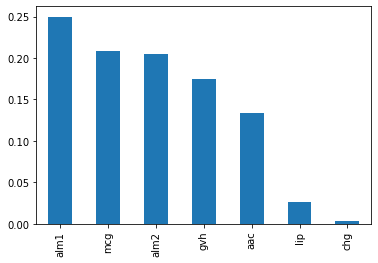

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x, y)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)

feat_importances.nlargest(7).plot(kind='bar')
plt.show()

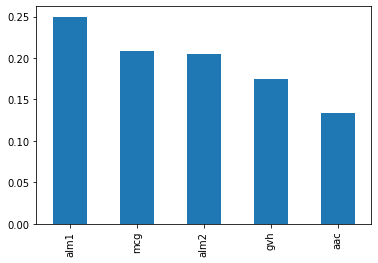

In [ ]:
feat_importances.nlargest(5).plot(kind='bar')
plt.show()

In [ ]:
feat_importances

mcg     0.208304
gvh     0.174158
lip     0.026499
chg     0.003548
aac     0.133197
alm1    0.249826
alm2    0.204468
dtype: float64

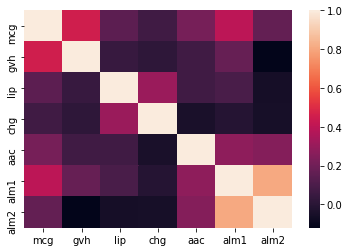

In [ ]:
sns.heatmap(df.corr())

In [ ]:
corr_mat=df.corr()

In [ ]:
corr_mat


,mcg,gvh,lip,chg,aac,alm1,alm2
mcg,1.000000,0.454805,0.146841,0.070266,0.220699,0.396979,0.167086
gvh,0.454805,1.000000,0.043804,0.018466,0.069824,0.173492,-0.120199
lip,0.146841,0.043804,1.000000,0.311951,0.070190,0.095788,-0.057570
chg,0.070266,0.018466,0.311951,1.000000,-0.044726,-0.007654,-0.052188
aac,0.220699,0.069824,0.070190,-0.044726,1.000000,0.279482,0.252675
alm1,0.396979,0.173492,0.095788,-0.007654,0.279482,1.000000,0.809324
alm2,0.167086,-0.120199,-0.057570,-0.052188,0.252675,0.809324,1.000000


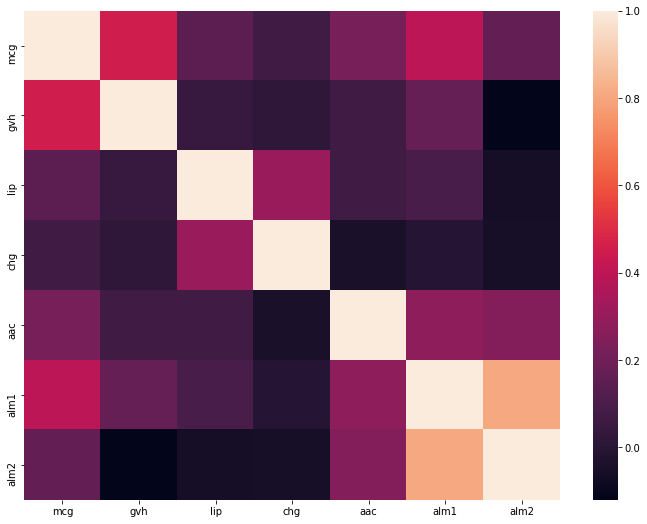

In [ ]:
plt.subplots(figsize=(12,9))
sns.heatmap(corr_mat)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()
select = RFE(estimator, 3, step=1)
select = select.fit(x, y)
rfe_mask = select.get_support() 
new_features = [] 
for bool, feature in zip(rfe_mask, x.columns):
 if bool:
  new_features.append(feature)
new_features

['mcg', 'alm1', 'alm2']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
ans=accuracy_score(y_test,knn.predict(x_test))
ans

0.8823529411764706

In [ ]:
xn=x[['mcg',
 'alm1',
 'alm2',
 'gvh',
 'aac']]
x_train,x_test,y_train,y_test=train_test_split(xn,y,test_size=0.2,random_state=5)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
ans=accuracy_score(y_test,knn.predict(x_test))
ans

0.8676470588235294

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(x_train)
X_test = pca.transform(x_test)

In [ ]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.54092107, 0.26692743, 0.08672348, 0.07397889, 0.03144912])